In [1]:
import torch
from torch import nn
from torch.nn import init
import utils

In [2]:
train_iter,test_iter = utils.load_data(256,4)

In [9]:
num_inputs = 28 * 28
num_outputs = 10

In [13]:
class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
    
    def forward(self, x):
        return self.linear(x.view(x.shape[0], -1))

In [14]:
net = LinearNet(num_inputs, num_outputs)

In [15]:
torch.nn.init.normal_(net.linear.weight, mean=0, std=0.01)
torch.nn.init.constant_(net.linear.bias, val=0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [17]:
loss = nn.CrossEntropyLoss() #loss function
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) #optimizer

In [18]:
for epoch in range(5):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y).sum()
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    test_acc = utils.evaluate_accuracy(test_iter, net)
    print('epoch %d, loss %f, train acc %f, test acc %f' % (epoch + 1, train_l_sum/n, train_acc_sum/n, test_acc))

epoch 1, loss 0.005348, train acc 0.645017, test acc 0.685300
epoch 2, loss 0.003589, train acc 0.717750, test acc 0.721600
epoch 3, loss 0.003145, train acc 0.749333, test acc 0.745900
epoch 4, loss 0.002909, train acc 0.767717, test acc 0.758700
epoch 5, loss 0.002752, train acc 0.779417, test acc 0.770800


In [19]:
import utils

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/arthur.xw/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


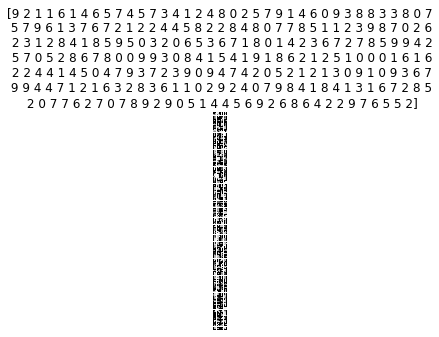

In [20]:
utils.imshow_batch(next(iter(test_iter)))